# Importing libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter

# Importing Dataset

In [4]:
data=pd.read_csv(r"C:\Users\vidya\Downloads\HousePrice.csv")
data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [6]:
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [7]:
data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [8]:
data.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636
BHK_NO.,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283
SQUARE_FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685
READY_TO_MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378
LONGITUDE,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112
LATITUDE,-0.000381,-0.065106,0.046930,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000


<AxesSubplot:>

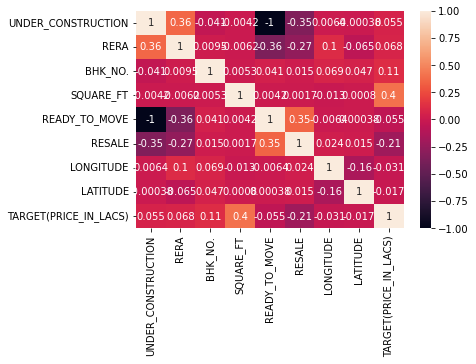

In [9]:
d=sns.heatmap(data.corr(),annot=True)
d

In [10]:
del data["LATITUDE"]
del data["LONGITUDE"]

In [11]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",60.5


In [13]:
data["ADDRESS"]=data["ADDRESS"].str.split(",").str.get(1)

In [15]:
data1=data.rename(columns={"ADDRESS":"City"})

In [16]:
data1.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,City,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,Mysore,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,Ghaziabad,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,Kolkata,60.5


# Label Encoding

In [18]:
l=LabelEncoder()
data1["POSTED_BY"]=l.fit_transform(data1["POSTED_BY"])
data1["BHK_OR_RK"]=l.fit_transform(data1["BHK_OR_RK"])
data1["City"]=l.fit_transform(data1["City"])



In [19]:
data1.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,City,TARGET(PRICE_IN_LACS)
0,2,0,0,2,0,1300.236407,1,1,167,55.0
1,1,0,0,2,0,1275.000000,1,1,313,51.0
2,2,0,0,2,0,933.159722,1,1,167,43.0
3,2,0,1,2,0,929.921143,1,1,227,62.5
4,1,1,0,2,0,999.009247,0,1,285,60.5


In [20]:
x=data1.iloc[:,:-1].values
y=data1.iloc[:,-1].values


In [21]:
print(x)

[[  2.   0.   0. ...   1.   1. 167.]
 [  1.   0.   0. ...   1.   1. 313.]
 [  2.   0.   0. ...   1.   1. 167.]
 ...
 [  1.   0.   0. ...   1.   1. 255.]
 [  2.   0.   0. ...   1.   1. 200.]
 [  1.   0.   1. ...   1.   1. 255.]]


In [22]:
print(y)

[55.  51.  43.  ... 27.1 67.  27.8]


In [ ]:
# s=StandardScaler()
# s1=s.fit_transform(x)
# s1

# plt.hist(x)
# plt.show()

# Normalisation

In [30]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()

In [31]:
data3=m.fit_transform(x)
data3

array([[1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.38657407],
       [0.5       , 0.        , 0.        , ..., 1.        , 1.        ,
        0.72453704],
       [1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.38657407],
       ...,
       [0.5       , 0.        , 0.        , ..., 1.        , 1.        ,
        0.59027778],
       [1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.46296296],
       [0.5       , 0.        , 1.        , ..., 1.        , 1.        ,
        0.59027778]])

In [36]:
data3.min()

0.0

In [35]:
data3.max()

1.0

In [40]:
X=data3
y=data.iloc[:,-1].values

In [41]:
print(X)

[[1.         0.         0.         ... 1.         1.         0.38657407]
 [0.5        0.         0.         ... 1.         1.         0.72453704]
 [1.         0.         0.         ... 1.         1.         0.38657407]
 ...
 [0.5        0.         0.         ... 1.         1.         0.59027778]
 [1.         0.         0.         ... 1.         1.         0.46296296]
 [0.5        0.         1.         ... 1.         1.         0.59027778]]


In [42]:
print(y)

[55.  51.  43.  ... 27.1 67.  27.8]


In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)

In [45]:
print((x_train).shape)
print((x_test).shape)
print((y_train).shape)
print((y_test).shape)

(23560, 9)
(5891, 9)
(23560,)
(5891,)


# Multiple linear regression

In [46]:
l1=LinearRegression()
l1.fit(x_train,y_train)

LinearRegression()

In [47]:
Intercept=l1.intercept_
Intercept

483.1264519370102

In [49]:
slope=l1.coef_
slope

array([-5.02560580e+01, -1.60145433e+01,  2.47592108e+01,  1.58027145e+03,
       -1.14917751e+02,  4.11056751e+04,  1.60145433e+01, -5.19709315e+02,
        6.36317983e+01])

In [50]:
y_pred_train=slope*x_train+Intercept
y_pred_train

array([[432.87039396, 483.12645194, 483.12645194, ..., 499.14099519,
        -36.58286345, 542.19207955],
       [432.87039396, 483.12645194, 483.12645194, ..., 499.14099519,
        -36.58286345, 533.05973812],
       [457.99842295, 467.11190868, 483.12645194, ..., 483.12645194,
        -36.58286345, 526.28412997],
       ...,
       [457.99842295, 483.12645194, 483.12645194, ..., 499.14099519,
        -36.58286345, 525.10576333],
       [432.87039396, 483.12645194, 483.12645194, ..., 499.14099519,
        -36.58286345, 523.19091755],
       [432.87039396, 483.12645194, 507.8856627 , ..., 499.14099519,
        -36.58286345, 529.96652571]])

In [52]:
y_pred_test=l1.predict(x_test)
y_pred_test

array([ 45.03326172, 172.42505411, -46.14538198, ...,  42.73414149,
        81.83358302,  62.26753526])

In [54]:
print(metrics.mean_absolute_error(y_test,y_pred_test))
print(metrics.mean_squared_error(y_test,y_pred_test))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

143.23780408984425
394747.10278068355
628.2890280600828


In [55]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred_test)*100
r2

34.84382520530943